In [ ]:
!pip install langdetect

     |████████████████████████████████| 983kB 11.4MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993194 sha256=857eda073954b2bada41671cd5a85a23bdf2fc4cf48d772897a3028f7c3db149
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


In [ ]:
import pandas as pd
import pickle
from matplotlib import pyplot as plt 
from langdetect import detect
import nltk
!python -m nltk.downloader all

/usr/lib/python3.6/runpy.py:125: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipp

In [ ]:
with open("Results.pkl","rb") as f:
    data = pickle.load(f)
df = pd.DataFrame(data)
df['Lang'] = df['text'].apply(lambda x: detect(x))
df = df[df["Lang"] == 'en']
df = df[~df['text'].str.contains('RightAIFuture')]
df = df[df["screen_username"]!="ceobillionaire"]
df = df[df["screen_username"]!="Montreal_AI"]
df = df[df["screen_username"]!="Quebec_AI"]
df.reset_index(inplace=True,drop=True)

In [ ]:
dfekman = df["ekman"].apply(pd.Series)
dfekman.columns = ["ekman_"+x for x in dfekman.columns]
dfplutchik = df["plutchik"].apply(pd.Series)
dfplutchik.columns = ["plutchik_"+x for x in dfplutchik.columns]
dfpoms = df["poms"].apply(pd.Series)
dfpoms.columns = ["poms_"+x for x in dfpoms.columns]
df_new = pd.concat([df, dfekman], axis = 1)
df_new = pd.concat([df_new, dfplutchik], axis = 1)
df_new = pd.concat([df_new, dfpoms], axis = 1)


In [ ]:
df_new['date'] = pd.to_datetime(df_new['time_creation'], format='%Y-%m-%d %H:%M:%S').dt.date
df_new = df_new.sort_values(by='date')

# Tweet Cleaning

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.tokenize.treebank import TreebankWordDetokenizer

import re


# Clean the Tweet
def clean_text(tweet):


  # split into words
  tokens = word_tokenize(tweet)
  # convert to lower case
  tokens = [w.lower() for w in tokens]
  # remove punctuation from each word
  import string
  table = str.maketrans('', '', string.punctuation)
  stripped = [w.translate(table) for w in tokens]
  # remove remaining tokens that are not alphabetic
  words = [word for word in stripped if word.isalpha()]
  # filter out stop words
  from nltk.corpus import stopwords
  stop_words = set(stopwords.words('english'))
  words = [w for w in words if not w in stop_words]


  # detokenize 
  cleaned_sentence = TreebankWordDetokenizer().detokenize(words)

  # remove hyperlink
  cleaned_sentence = re.sub(r"http\S+", "", cleaned_sentence)



  # print(cleaned_sentence)
  return cleaned_sentence



# Read Data

In [ ]:
import pandas as pd
import numpy as np

df = df_new.copy()
# standardize the time
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')

# clean the texts
df['text'] = df['text'].apply(clean_text)





In [ ]:
df["ekman_emotion"] = df["ekman"].apply(lambda x: max(x, key=x.get))
df["plutchik_emotion"] = df["plutchik"].apply(lambda x: max(x, key=x.get))
df["poms_emotion"] = df["poms"].apply(lambda x: max(x, key=x.get))

# Word Cloud for All Tweets

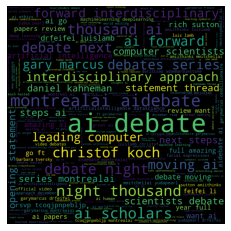

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud


# change pandas dataframe to word corpus
txt_df = df['text']
np.savetxt('np.txt', txt_df.values, fmt='%s')

with open('np.txt') as file:
  text = file.read()
  # print(text)

# text = ' go go to the school university school school school'
wordcloud = WordCloud(width=1000, height=1000).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
wordcloud.scale = 2
wordcloud.to_file('All_tweet.png')

# plt.figure(figsize=(50,50))
plt.show()


# Word cloud for first week

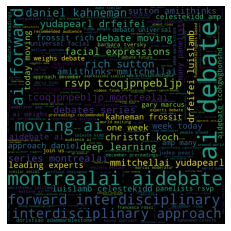

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from datetime import datetime


first_week = df[df['date']<datetime(2020, 12, 23)]

# change pandas dataframe to word corpus
txt_df = first_week['text']
np.savetxt('np.txt', txt_df.values, fmt='%s')

with open('np.txt') as file:
  text = file.read()
  # print(text)

# text = ' go go to the school university school school school'
wordcloud = WordCloud(width=1000, height=1000).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
wordcloud.to_file('Before_debate.png') 
# plt.figure(figsize=(50,50))
plt.show()

# Word cloud for Second week

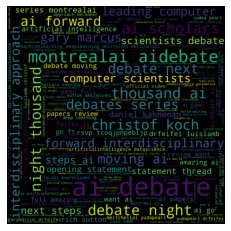

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from datetime import datetime


second_week = df[df['date']>=datetime(2019, 12, 23)]

# change pandas dataframe to word corpus
txt_df = second_week['text']
np.savetxt('np.txt', txt_df.values, fmt='%s')

with open('np.txt') as file:
  text = file.read()
  # print(text)

# text = ' go go to the school university school school school'
wordcloud = WordCloud(width=1000, height=1000).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
wordcloud.to_file('After_debate.png')
# plt.figure(figsize=(50,50))
plt.show()

# Word Cloud of tweets containing emotions

In [ ]:
def plot_cloud(df_, method, emotion):
    df = df_.copy()
    df = df[df[method+"_emotion"]== emotion]
    txt_df = df['text']
    np.savetxt('np.txt', txt_df.values, fmt='%s')
    with open('np.txt') as file:
        text = file.read()
    wordcloud = WordCloud(width=1000, height=1000).generate(text)
    plt.imshow(wordcloud)
    plt.axis("off")
    wordcloud.to_file(method+"_"+emotion+'.png')
    # plt.figure(figsize=(50,50))
    plt.show()

In [ ]:
df["ekman"].iloc[0]

{'Anger': 0.0076080277,
 'Disgust': 0.0029584484,
 'Fear': 0.11380901,
 'Joy': 0.8395771,
 'Sadness': 0.0107867895,
 'Surprise': 0.025260614}

In [ ]:
df["plutchik"].iloc[0]

{'Anger': 0.0053252345,
 'Anticipation': 0.009254219,
 'Disgust': 0.0021367338,
 'Fear': 0.06154198,
 'Joy': 0.4236326,
 'Sadness': 0.005304433,
 'Surprise': 0.014904263,
 'Trust': 0.47790053}

In [ ]:
df["poms"].iloc[0]

{'Anger': 0.283853,
 'Confusion': 0.43454716,
 'Depression': 0.26479363,
 'Fatigue': 0.00945272,
 'Tension': 0.004658619,
 'Vigour': 0.002694865}

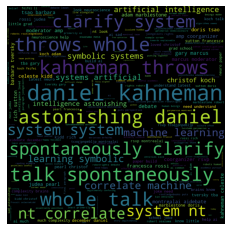

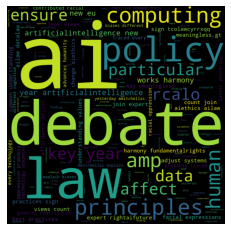

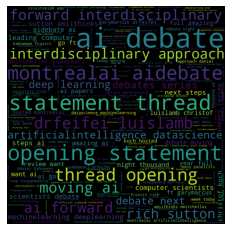

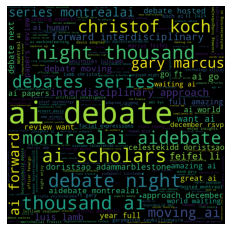

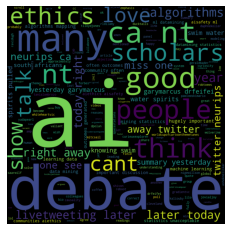

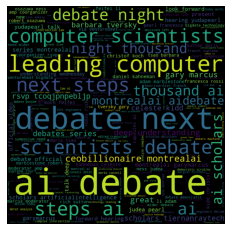

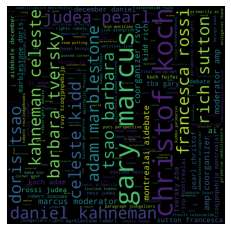

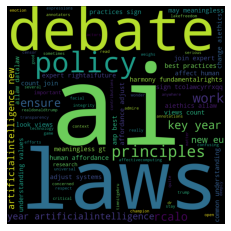

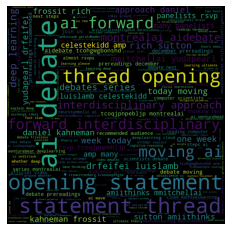

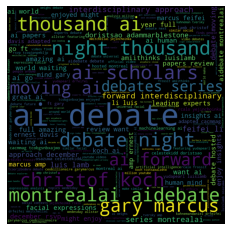

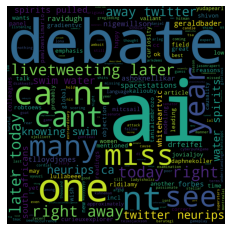

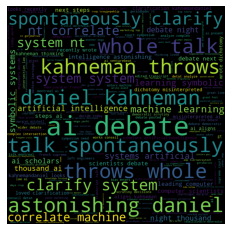

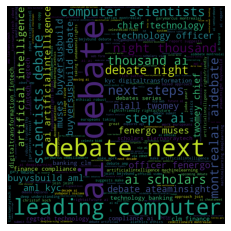

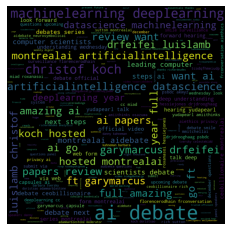

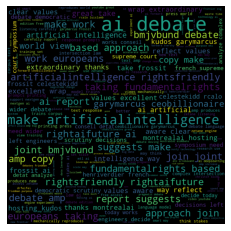

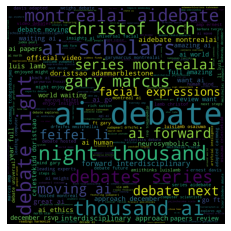

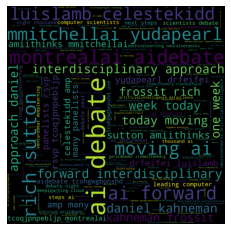

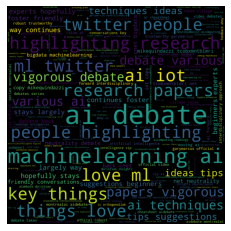

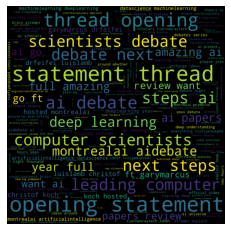

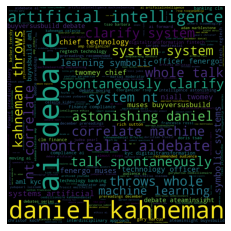

In [ ]:
method = ["ekman","plutchik","poms"]
for m in method:
    emotions = df[m].iloc[0].keys()
    for em in emotions:
        plot_cloud(df,m,em)

In [ ]:
!zip pics *.png

  adding: After_debate.png (deflated 0%)
  adding: All_tweet.png (deflated 0%)
  adding: Before_debate.png (deflated 0%)
  adding: ekman_Anger.png (deflated 0%)
  adding: ekman_Disgust.png (deflated 0%)
  adding: ekman_Fear.png (deflated 0%)
  adding: ekman_Joy.png (deflated 0%)
  adding: ekman_Sadness.png (deflated 0%)
  adding: ekman_Surprise.png (deflated 0%)
  adding: plutchik_Anger.png (deflated 0%)
  adding: plutchik_Anticipation.png (deflated 0%)
  adding: plutchik_Disgust.png (deflated 1%)
  adding: plutchik_Fear.png (deflated 0%)
  adding: plutchik_Joy.png (deflated 0%)
  adding: plutchik_Sadness.png (deflated 0%)
  adding: plutchik_Surprise.png (deflated 0%)
  adding: plutchik_Trust.png (deflated 0%)
  adding: poms_Anger.png (deflated 0%)
  adding: poms_Confusion.png (deflated 0%)
  adding: poms_Depression.png (deflated 0%)
  adding: poms_Fatigue.png (deflated 0%)
  adding: poms_Tension.png (deflated 0%)
  adding: poms_Vigour.png (deflated 0%)
